In [2]:
# TASK 1
avg=1332
sd=725
upper_l=avg+(4*sd)
lower_l=avg-(4*sd)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

tr=np.arange(lower_l,upper_l)

In [3]:
# TASK 1a
zs1=(2000-avg)/sd
print('The proportion of tax returns greater than $2000 is %1.4f'%(1-(norm.cdf(zs1))))

The proportion of tax returns greater than $2000 is 0.1784


In [4]:
# TASK 1b
zs2=(0-avg)/sd
print('The proportion of tax indicates that indicates a taxpayer owes money to the government is %1.4f'%(norm.cdf(zs2)))

The proportion of tax indicates that indicates a taxpayer owes money to the government is 0.0331


In [5]:
# TASK 1c
zs3=(100-avg)/sd
zs4=(700-avg)/sd
print('The proportion of tax return that indicates a refund between $100 and $700 is %1.4f'%((norm.cdf(zs4))-(norm.cdf(zs3))))

The proportion of tax return that indicates a refund between $100 and $700 is 0.1470


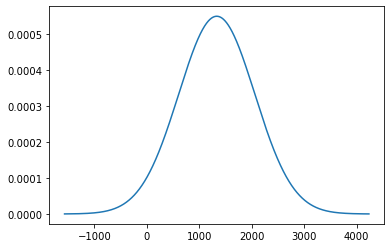

In [6]:
# Normal Distribution Curve
plt.plot(tr,norm.pdf(tr,avg,sd))
plt.show()

In [7]:
# TASK 2
import pandas as pd
com=pd.read_csv('DS1_C5_S5_Continuous_Practice_Computers_Data.csv')
com

,index,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1
...,...,...,...,...,...,...,...,...,...,...,...
6254,6255,1690,100,528,8,15,no,no,yes,39,35
6255,6256,2223,66,850,16,15,yes,yes,yes,39,35
6256,6257,2654,100,1200,24,15,yes,no,yes,39,35
6257,6258,2195,100,850,16,15,yes,no,yes,39,35


In [8]:
# i
com=com[com.price<=4000]
# ii
gr_data1=com.groupby(by=['screen'])
scr=com.screen.unique()
com_s=pd.DataFrame()

for s in scr:
    s_data=gr_data1.get_group(s)
    sample_data1=s_data.sample(n=20, replace=True, random_state= 1)
    com_s=com_s.append(sample_data1, ignore_index= True)
    
print(com_s)

    index  price  speed    hd  ram  screen   cd multi premium  ads  trend
0    1530   2295     33   426    8      14   no    no     yes  283     10
1     325   1690     33    85    2      14   no    no     yes  108      4
2    1582   1499     25   120    4      14   no    no     yes  283     10
3    1307   2690     33   528   16      14   no    no     yes  246      9
4    4247   2494     33   720   16      14  yes    no     yes  248     20
5    4463   2344     66   528    8      14  yes    no     yes  248     20
6    1383   2344     33   120    4      14  yes    no      no  246      9
7     197   2099     33   212    4      14   no    no     yes  100      3
8     180   1695     50    85    2      14   no    no     yes   95      2
9    4302   2143     33   528    8      14  yes   yes     yes  248     20
10   3886   1595     66   214    4      14   no    no     yes  273     18
11   5722   1829     66   420    8      14   no    no      no  132     28
12   5424   2563    100   270    4    

In [9]:
# TASK 2 iii
import statistics as st
upper_l=com_s['price'].max()
lower_l=com_s['price'].min()
avg1=com_s['price'].mean()
sd1=st.stdev(com_s['price'])
# a. 
zs5=(2700-avg1)/sd1
print('a. The probability that computers prices in the sample are greater than $2,700 is %1.4f'%(1-(norm.cdf(zs5))))
# b.
zs6=(1301-avg1)/sd1
print('b. The probability that computers prices in the sample are less than $1301 is %1.4f'%(norm.cdf(zs6)))
# c.
zs7=(2900-avg1)/sd1
zs8=(2000-avg1)/sd1
print('c. The probability that computers prices in the sample are between $2000 and $2900 is %1.4f'%((norm.cdf(zs7))-norm.cdf(zs8)))

a. The probability that computers prices in the sample are greater than $2,700 is 0.2973
b. The probability that computers prices in the sample are less than $1301 is 0.0288
c. The probability that computers prices in the sample are between $2000 and $2900 is 0.5636


In [10]:
# TASK 2b
com_range=len(com)
com_mean=com['price'].mean()
com_median=com['price'].median()
com_mode=com['price'].mode()
com_sd=st.stdev(com['price'])

coms_range=len(com_s)
coms_median=com_s['price'].median()
coms_mode=com_s['price'].mode()

print('com size= ',com_range)
print('com mean= %1.3f'%com_mean)
print('com median= ',com_median)
print('com mode= ',com_mode)
print('com standard deviation= %1.3f'%com_sd)
print()
print('sample size= ',coms_range)
print('sample mean= %1.3f'%avg1)
print('sample median= ',coms_median)
print('sample mode= ',coms_mode)
print('sample standard deviation= %1.3f'%sd1)

com size=  6229
com mean= 2208.856
com median=  2144.0
com mode=  0    1999
dtype: int64
com standard deviation= 560.501

sample size=  60
sample mean= 2393.783
sample median=  2327.0
sample mode=  0    1590
dtype: int64
sample standard deviation= 575.454


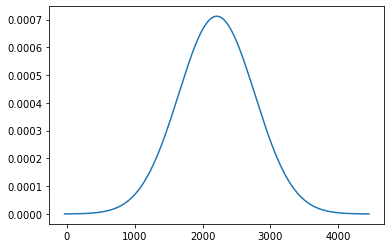

In [11]:
# Plotting the normal distribution of the population.
l1=com_mean-(4*com_sd)
u1=com_mean+(4*com_sd)
r1=np.arange(l1,u1)
plt.plot(r1,norm.pdf(r1,com_mean,com_sd))
plt.show()

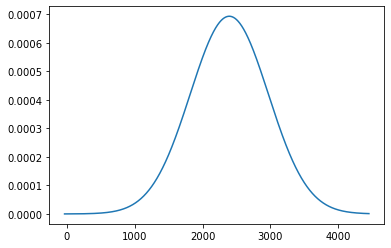

In [13]:
#Plotting the normal distribution of the sample.
l2=avg1-(4*sd1)
u2=avg1+(4*sd1)
r2=np.arange(l2,u2)
plt.plot(r1,norm.pdf(r1,avg1,sd1))
plt.show()